In [1]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

try:
  from konlpy.tag import Okt
except ModuleNotFoundError:
  !pip install konlpy
  from konlpy.tag import Okt

In [3]:
import tensorflow as tf

In [93]:
base_model=tf.keras.models.load_model("base_model.h5")

In [5]:
def sentence_to_input(sentence):
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    return pad_new

In [6]:
data=pd.read_table("2019_news.csv", delimiter=",")
data[1720:1725]

,Date,Title,Article,Label
1720,2019-04-30 8:41,"美 경기회복, 연준 매파 전환?…FOMC 회의결과 '주목'",임종철 디자인기자 사진=임종철 디자인기자미국의 경기가 회복세로 나타나면서 다음달 1...,1.0
1721,2019-04-30 8:19,소비 지표 호조에 '사상 최고',S&P500·나스닥 지수 상승세 지속에 또 최고치 경신국제유가는 혼조세...위험자산...,1.0
1722,2019-04-30 7:54,나스닥·S&P 최고치 경신…그들만의 잔치?,전날 코스피는 4거래일 만에 상승세로 돌아섰다. 그 또한 기관과 외국인의 매수세에 ...,1.0
1723,2019-04-30 2:00,스페인 총선 결과 주목…소폭 상승,29일 유럽 주요국 증시는 스페인의 조기 총선 이후 정치적 불확실성에 주목하며 보합...,0.0
1724,2019-05-01 23:18,S&P500 사상 최고…애플 등 기술주 호조,뉴욕증권거래소© AFP=뉴스1 권영미 기자 = 1일 뉴욕증시 3대 지수가 모두 상승...,NaN


In [7]:
data[1719:1724]

,Date,Title,Article,Label
1719,2019-04-30 6:37,연내 '금리인하' 기대에 S&P 최고치 재돌파,S&P 500 지수와 나스닥종합지수가 두 거래일 연속 사상최고치를 갈아치웠다. 낮은...,1.0
1720,2019-04-30 8:41,"美 경기회복, 연준 매파 전환?…FOMC 회의결과 '주목'",임종철 디자인기자 사진=임종철 디자인기자미국의 경기가 회복세로 나타나면서 다음달 1...,1.0
1721,2019-04-30 8:19,소비 지표 호조에 '사상 최고',S&P500·나스닥 지수 상승세 지속에 또 최고치 경신국제유가는 혼조세...위험자산...,1.0
1722,2019-04-30 7:54,나스닥·S&P 최고치 경신…그들만의 잔치?,전날 코스피는 4거래일 만에 상승세로 돌아섰다. 그 또한 기관과 외국인의 매수세에 ...,1.0
1723,2019-04-30 2:00,스페인 총선 결과 주목…소폭 상승,29일 유럽 주요국 증시는 스페인의 조기 총선 이후 정치적 불확실성에 주목하며 보합...,0.0


In [8]:
# Null값 확인하기
if data['Article'].isnull().values.any():
  print(data['Article'].isnull().sum())
  print()

  # Null 값 제거하기
  data['Article'] = data['Article'].dropna(how = "any")

  # Null 값 있는지 다시 한 번 확인
  print(data['Article'].isnull().sum())


In [9]:
data[:5]

,Date,Title,Article,Label
0,2019-01-01 10:12,"""새해에도 바닥다지기 지속…랠리 촉매제 필요""",뉴욕증시가 2018년 마지막 거래일에도 오르며 크리스마스 이후 막판 상승세를 이어갔...,-1.0
1,2019-01-01 8:24,마지막 날 웃었지만···,미중 무역협상 기대에 31일 다우 1.15% 상승 마감증시 10년 강세장 마감 속 ...,-1.0
2,2019-01-01 7:39,"3대 지수, 2008년 이후 최악의 해...다우, 연간 5.6%↓",뉴욕증시가 미중간 무역협상 기대감에 올해 마지막 거래일을 상승으로 마감했다. 하지만...,-1.0
3,2019-01-01 3:23,"파리 오르고, 런던 내리고..'혼조' 마감",2018년의 마지막 날인 31일 유럽 주요 증시는 혼조세를 보이며 거래를 마쳤다.이...,-1.0
4,2019-01-02 18:00,中 지표부진에 '발목'…2010선 간신히 방어,막 오른 2019 증시…첫날부터 '내리막길' 탄 코스피中 제조업구매지수 50 밑돌아...,-1.0


In [10]:
x_train=data['Article'][:1501]

In [11]:
y_train=data['Label'][:1501]

In [12]:
x_test=data['Article'][1501:]
y_test=data['Label'][1501:]

In [13]:
x_train[:1]

0    뉴욕증시가 2018년 마지막 거래일에도 오르며 크리스마스 이후 막판 상승세를 이어갔...
Name: Article, dtype: object

In [14]:
# 불용어 리스트
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [15]:
okt = Okt()
X_train = []
for sentence in x_train:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)
print(X_train[:3])

[['뉴욕증시', '2018년', '마지막', '거래', '일', '에도', '오르다', '크리스마스', '이후', '막판', '상승세', '이다', '가다', '.', '하지만', '3', '대다', '주요', '지수', '연간', '3~6%', '대다', '하락', '2008년', '금융위기', '이후', '최악', '연간', '상', '승률', '을', '기록', '.', '월', '전문가', '뉴욕증시', '내년', '초', '상승세', '보이다', '수', '있다', ',', '추가', '적', '인', '바닥', '다지다', '과정', '을', '필요', '로', '것', '이라고', '진단', '.', '랠리', '위', '구체', '적', '인', '촉', '매제', '필요하다', '연방', '정부', '셧다운', ',', '밉다', '중간', '무역', '협상', '등', '불확실', '성', '대한', '경계', '감', '을', '가다', '야하다', '지적', '이다', '.', '31일', '다우존스', '산업', '평균', '지수', '전일', '대비', '265.06', '포인트', '상승', '2만', '3327.46', '거래', '마치다', '.', 'S', '&', 'P', '500', '지수', '전일', '대비', '21.11', '포인트', '오른', '2506.85', '로', '장', '을', '끝내다', '.', '기술', '주', '중심', '나스닥', '종합', '지수', '6635.28', '로', '전일', '대비', '50.76', '포인트', '오르다', '.', '제프', '디', '그라프', '르네상스', '매크로', '리서치', '회장', '새해', '첫', '2~3', '주간', '을', '전망', '해보다', '시장', '궁극', '적', '약세', '장', '에서', '다음', '단계', '로', '나아가다', '전', '극단', '적', '인', '심리', '완화', '되다', ',', '낙관

In [16]:
X_test = []
for sentence in x_test:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)
print(X_test[:3])

[['15일', '원', '·', '달러', '환율', '1133.10원', '마감', '…', '6.30원', '↓', '15일', '서', '울', '외환시장', '에서', '원', '·', '달러', '환율', '변동', '추이', '.', '자료', '=', '마켓', '포인트', '15일', '원', '·', '달러', '환율', '1130원', '초', '중반', '대로', '하락', '마감', '.', '중국', '경제지표', '호조', '힘', '입다', '날', '아시아', '금융시장', '에서', '위험', '자산', '선호', '심리', '우세하다', '것', '보이다', '.', '15일', '마켓', '포인트', '따르다', '날', '서', '울', '외환시장', '에서', '원', '·', '달러', '환율', '전', '거래', '일', '대비', '6.30원', '하락', '1133.10원', '거래', '마치다', '.', '지난달', '22일', '이후', '가장', '낮다', '수준', '이다', '.', '하락', '폭', '지난', '1월', '25일', '이후', '가장', '크다', '.', '투자', '심리', '양호', '.', '지난', '12일', '발표', '되다', '중국', '수출', '지표', '예상', '보다', '호조', '보이', '면서', '다', '.', '중국', '경기', '살아나다', '아시아', '신흥', '국', '을', '비롯', '한국', ',', '호주', ',', '독일', '등', '글로벌', '경제', '전반', '긍정', '적', '영향', '을', '받다', '수', '있다', '.', '코스피', '지수', '날', '0.42%', '상승', '.', '외국인', '투자자', '유가', '증권', '시장', '에서', '1806억원', '가량', '매수', '우위', '보이다', '.', '외국인', '투자자', '지난달', '29일', '부터', '날', '까지', '

In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'.': 1, '을': 2, ',': 3, '있다': 4, '되다': 5, '것': 6, '이다': 7, '등': 8, '로': 9, '에서': 10, '적': 11, '지수': 12, '상승': 13, '시장': 14, '·': 15, '고': 16, '증권': 17, '인': 18, "'": 19, '투자': 20, '중국': 21, '미국': 22, '기': 23, '수': 24, '하락': 25, '증시': 26, '다': 27, '거래': 28, '중': 29, '전': 30, '기업': 31, '주': 32, '“': 33, '”': 34, '주가': 35, '따르다': 36, '지난해': 37, '보다': 38, '실적': 39, '돼다': 40, '성': 41, '무역': 42, '날': 43, '대비': 44, '밉다': 45, '장': 46, '하고': 47, '연구원': 48, '외국인': 49, '대한': 50, '협상': 51, '전망': 52, '마감': 53, '종목': 54, '코스피': 55, '한국': 56, '보이다': 57, '올해': 58, '기록': 59, '며': 60, '경기': 61, '순': 62, '않다': 63, '포인트': 64, '이후': 65, '까지': 66, '예상': 67, '달러': 68, '오르다': 69, '크다': 70, '말': 71, '이라고': 72, '전자': 73, '업종': 74, '‘': 75, '국내': 76, '가능성': 77, '오른': 78, '매수': 79, '일': 80, '’': 81, '발표': 82, '=': 83, '관련': 84, '기자': 85, '점': 86, '환율': 87, '이익': 88, '삼': 89, '우려': 90, '지난': 91, '주식': 92, '나오다': 93, '오다': 94, '금리': 95, '높다': 96, '대다': 97, '투자자': 98, '개': 99, '마치다': 100, '코스닥': 101, '최근': 102, '기관

In [18]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 24434
등장 빈도가 2번 이하인 희귀 단어의 수: 14235
단어 집합에서 희귀 단어의 비율: 58.25898338380945
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.5477924880313902


In [19]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 10201


In [20]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
print(X_train[:3])

[[422, 706, 2012, 29, 81, 142, 70, 8382, 66, 1685, 219, 8, 117, 2, 277, 155, 98, 135, 13, 923, 1, 98, 26, 1485, 1463, 66, 1569, 923, 128, 681, 3, 60, 2, 1360, 234, 422, 1320, 529, 219, 58, 25, 5, 4, 224, 12, 19, 733, 3522, 679, 3, 414, 10, 7, 73, 617, 2, 853, 154, 1147, 12, 19, 8383, 8384, 420, 240, 177, 455, 4, 46, 1010, 43, 52, 9, 268, 42, 51, 995, 645, 3, 117, 3300, 432, 8, 2, 1390, 476, 141, 206, 13, 158, 45, 7289, 65, 14, 295, 8385, 29, 101, 2, 357, 334, 463, 298, 13, 158, 45, 7290, 65, 79, 8386, 10, 47, 3, 1391, 2, 232, 33, 258, 339, 387, 13, 8387, 10, 158, 45, 7291, 65, 70, 2, 7292, 1746, 1, 5946, 1795, 1262, 450, 1048, 637, 5150, 948, 3, 53, 1603, 15, 6519, 12, 288, 47, 11, 518, 1049, 10, 3815, 31, 2828, 12, 19, 167, 218, 6, 4, 696, 642, 3, 377, 670, 205, 14, 7, 2749, 17, 53, 2, 1, 211, 734, 8388, 1, 133, 594, 488, 15, 289, 117, 8389, 1, 1187, 474, 43, 85, 602, 468, 15, 14, 1036, 3, 964, 61, 2221, 1048, 46, 240, 177, 455, 1221, 27, 224, 14, 3, 154, 3973, 3, 122, 7, 73, 464, 2, 

In [21]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

1501
1501


In [22]:
y_train = np.array(y_train)
y_test = np.array(y_test)

리뷰의 최대 길이 : 1401
리뷰의 평균 길이 : 467.43970686209195


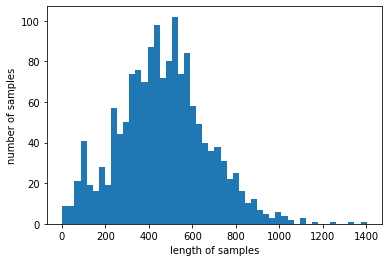

In [23]:
# 전체 데이터에서 가장 길이가 긴 리뷰와 전체 데이터의 길이 분포
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [24]:
# 전체 샘플 중 길이가 max_len 이하인 샘플의 비율이 몇 %인지 확인하는 함수
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [25]:
max_len = 750
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 750 이하인 샘플의 비율: 91.40572951365756


In [26]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [27]:
base_model.trainable=False

In [28]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1941400   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 4,117,554
Trainable params: 2,058,777
Non-trainable params: 2,058,777
_________________________________________________________________


In [29]:
base_model.layers

In [30]:
base_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [31]:
base_model.evaluate(X_test, y_test)

3463/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[nan, 0.0323419]

In [32]:
print(y_test[:5])

[ 1.  1. -1.  0.  0.]


In [33]:
base_model.predict(X_test[:5])

array([[0.11651334],
       [0.02146628],
       [0.00540408],
       [0.00145453],
       [0.45223722]], dtype=float32)

# 임베딩 벡터의 차원은 100으로 정했고, 리뷰 분류를 위해서 LSTM을 사용
model = Sequential()
model.add(Embedding(vocab_size, 200))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128))
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(1, activation='softmax'))

import keras.losses

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

hist=model.fit(X_train, y_train)

In [47]:
y_test=y_test+1

In [49]:
y_test[50:90]

array([0., 0., 1., 0., 0., 0., 2., 1., 0., 1., 1., 0., 2., 0., 1., 1., 1.,
       0., 0., 2., 2., 1., 2., 1., 2., 1., 0., 0., 0., 0., 2., 0., 0., 0.,
       2., 1., 2., 2., 0., 1.])

In [51]:
y_train=y_train+1

In [61]:
# 임베딩 벡터의 차원은 100으로 정했고, 리뷰 분류를 위해서 LSTM을 사용
model2 = Sequential()
model2.add(Embedding(vocab_size, 200))
model2.add(LSTM(256, return_sequences=True, activation='relu'))
model2.add(BatchNormalization())
model2.add(LSTM(256))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(3, activation='softmax'))

In [62]:
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
hist2=model2.fit(X_train, y_train, epochs=10,  validation_split=0.2)

Train on 1200 samples, validate on 301 samples
Epoch 1/10
1200/1200 [==============================] - 46s 38ms/sample - loss: 1.0957 - acc: 0.3917 - val_loss: 1.0943 - val_acc: 0.4419
Epoch 2/10
1200/1200 [==============================] - 40s 34ms/sample - loss: 1.0351 - acc: 0.4758 - val_loss: 1.0967 - val_acc: 0.3322
Epoch 3/10
1200/1200 [==============================] - 40s 33ms/sample - loss: 1.0226 - acc: 0.4667 - val_loss: 1.0927 - val_acc: 0.4419
Epoch 4/10
1200/1200 [==============================] - 40s 34ms/sample - loss: 1.0916 - acc: 0.4258 - val_loss: 1.0863 - val_acc: 0.4419
Epoch 5/10
1200/1200 [==============================] - 41s 34ms/sample - loss: 1.0870 - acc: 0.4258 - val_loss: 1.0812 - val_acc: 0.4419
Epoch 6/10
 448/1200 [==========>...................] - ETA: 22s - loss: 1.0846 - acc: 0.4231

KeyboardInterrupt: 

In [94]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1941400   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,058,777
Trainable params: 2,058,777
Non-trainable params: 0
_________________________________________________________________


In [95]:
base_model.pop()
base_model.trainable = False

In [96]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1941400   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
Total params: 4,117,425
Trainable params: 2,058,777
Non-trainable params: 2,058,648
_________________________________________________________________


In [97]:
inputs = tf.keras.Input(shape=(None,))
x=base_model(inputs, training=False)
x=tf.keras.layers.Dense(128, activation='relu')(x)
x=tf.keras.layers.Dense(64, activation='relu')(x)
x=tf.keras.layers.Dense(32, activation='relu')(x)
outputs=tf.keras.layers.Dense(3, activation='softmax')(x)
model3=tf.keras.Model(inputs, outputs)

In [98]:
model3.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, None)]            0         
_________________________________________________________________
sequential (Sequential)      (None, 128)               2058648   
_________________________________________________________________
dense_48 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_50 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_51 (Dense)             (None, 3)                 99        
Total params: 2,085,595
Trainable params: 26,947
Non-trainable params: 2,058,648
____________________________________________

In [99]:
model3.compile(optimizer=tf.keras.optimizers.Adam,
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [101]:
model3.fit(X_train, y_train, epochs=5)

Train on 1501 samples
Epoch 1/5
1501/1501 [==============================] - 29s 19ms/sample - loss: 1.1022 - accuracy: 0.3504
Epoch 2/5
1501/1501 [==============================] - 29s 19ms/sample - loss: 1.0808 - accuracy: 0.4144
Epoch 3/5
1501/1501 [==============================] - 29s 20ms/sample - loss: 1.0737 - accuracy: 0.4264
Epoch 4/5
1501/1501 [==============================] - 29s 19ms/sample - loss: 1.0677 - accuracy: 0.4370
Epoch 5/5
1501/1501 [==============================] - 29s 19ms/sample - loss: 1.0638 - accuracy: 0.4390
